In [17]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import Input
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
# Carregar e preparar os dados
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0

In [18]:
# Definir a arquitetura do modelo
model = models.Sequential([
    Input(shape=(28, 28, 1)),  
    layers.Conv2D(32, (3, 3), activation='relu'),  
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [4]:
# Compilar e treinar o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
          y=train_labels,
          epochs=5,
          validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 22ms/step - accuracy: 0.8890 - loss: 0.3483 - val_accuracy: 0.9787 - val_loss: 0.0648
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9849 - loss: 0.0492 - val_accuracy: 0.9858 - val_loss: 0.0404
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9896 - loss: 0.0327 - val_accuracy: 0.9910 - val_loss: 0.0299
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9922 - loss: 0.0251 - val_accuracy: 0.9900 - val_loss: 0.0330
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9941 - loss: 0.0189 - val_accuracy: 0.9904 - val_loss: 0.0326


In [5]:
# Fazer previsões
y_true = test_labels
y_pred = np.argmax(model.predict(test_images), axis=1)  # Substitui o predict_classes obsoleto

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [6]:
# Matriz de confusão
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

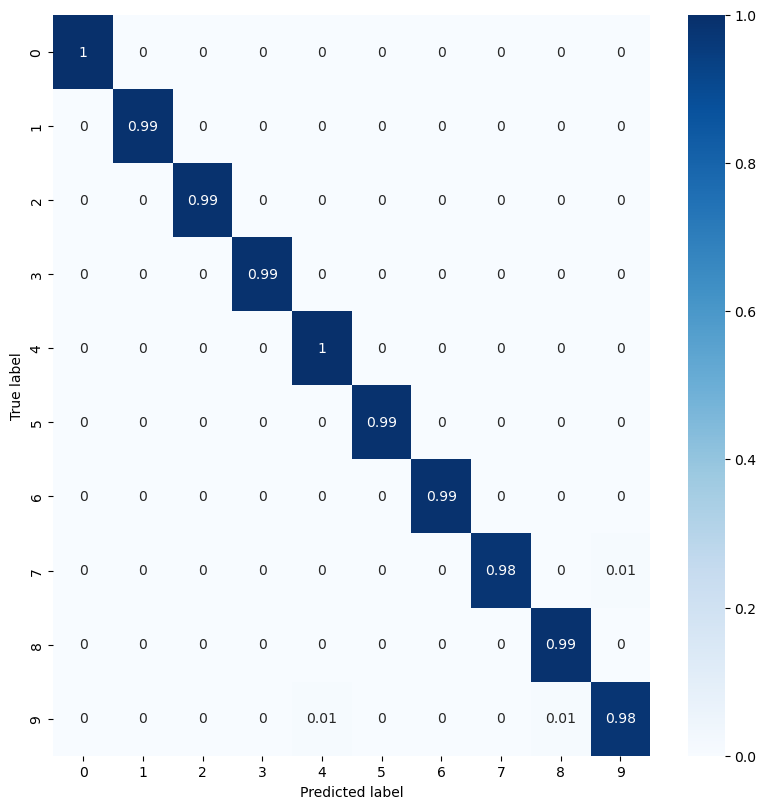

In [7]:
# Plotar matriz de confusão
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [11]:
# =============================================
# CÁLCULO MANUAL (como no seu código original)
# =============================================
print("\n--- Cálculo Manual das Métricas ---")

# Funções para calcular as métricas
def calcular_metricas(VP, FN, FP, VN):
    # Sensibilidade (Recall)
    sensibilidade = VP / (VP + FN)
    
    # Especificidade
    especificidade = VN / (FP + VN)
    
    # Acurácia
    acuracia = (VP + VN) / (VP + FN + FP + VN)
    
    # Precisão
    precisao = VP / (VP + FP)
    
    # F-score
    f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)
    
    return {
        'Sensibilidade (Recall)': sensibilidade,
        'Especificidade': especificidade,
        'Acurácia': acuracia,
        'Precisão': precisao,
        'F-score': f_score
    }


--- Cálculo Manual das Métricas ---


In [12]:
# Exemplo de cálculo para uma classe (por exemplo, classe 0)
# Extrair VP, FN, FP, VN da matriz de confusão para a classe 0
classe = 0
VP = con_mat[classe, classe]
FN = sum(con_mat[classe, :]) - VP
FP = sum(con_mat[:, classe]) - VP
VN = sum(sum(con_mat)) - VP - FN - FP

metricas_classe_0 = calcular_metricas(VP, FN, FP, VN)
print("\nMétricas para a classe 0:")
for metrica, valor in metricas_classe_0.items():
    print(f"{metrica}: {valor:.4f}")


Métricas para a classe 0:
Sensibilidade (Recall): 0.9969
Especificidade: 0.9990
Acurácia: 0.9988
Precisão: 0.9909
F-score: 0.9939


In [15]:
# =============================================
# CÁLCULO AUTOMÁTICO (usando bibliotecas)
# =============================================
print("\n--- Cálculo Automático das Métricas ---")

# Métricas gerais (acurácia já vem do model.evaluate)
_, acuracia = model.evaluate(test_images, test_labels, verbose=0)
print(f"\nAcurácia geral: {acuracia:.4f}")

# Relatório completo por classe (Scikit-learn)
print("\nRelatório de classificação por classe:")
print(classification_report(y_true, y_pred, digits=4))



--- Cálculo Automático das Métricas ---

Acurácia geral: 0.9904

Relatório de classificação por classe:
              precision    recall  f1-score   support

           0     0.9909    0.9969    0.9939       980
           1     0.9956    0.9912    0.9934      1135
           2     0.9951    0.9864    0.9908      1032
           3     0.9941    0.9931    0.9936      1010
           4     0.9810    0.9980    0.9894       982
           5     0.9866    0.9910    0.9888       892
           6     0.9845    0.9948    0.9896       958
           7     0.9961    0.9844    0.9902      1028
           8     0.9897    0.9908    0.9903       974
           9     0.9890    0.9782    0.9836      1009

    accuracy                         0.9904     10000
   macro avg     0.9902    0.9905    0.9903     10000
weighted avg     0.9904    0.9904    0.9904     10000

